## Partie D)

Écrire un code de calcul générique (c-à-d pour un Ntot non précisé d’avance) pour résoudre l’Éq. (1) (avez S une réaction du premier ordre ou un terme source constant en fonction des spécifications du problème). Celui-ci nous servira particulièrement pour le Devoir 2.


$ C_{i = 1, ..., 3}^{t} (1 - \Delta t k) = C_{i-1}^{t+1} (\frac{- \Delta t D_{eff}}{\Delta r}) 
+ C_{i}^{t+1} (1 + \frac{2 \Delta t D_{eff}}{\Delta r^2} + \frac{\Delta t D_{eff}}{r \Delta r})
+ C_{i+1}^{t+1} (\frac{-\Delta t D_{eff}}{\Delta r^2} - \frac{\Delta t D_{eff}}{r \Delta r})$

$C_0^t (1 - \Delta t k) = C_0^{t+1} $ (condition neuman à $r=0$)

$ C_{4}^{t} = C_e $ (condition dirichlet à $r = R$)

# Partie B)

Schémas numériques : 

$ \frac{\partial C}{\partial r} \approx \frac{C_{i+1} - C_{i}}{\Delta r} $

$ \frac{\partial^2 C}{\partial r^2} \approx \frac{C_{i+1} - 2 C_i + C_{i-1}}{\Delta r^2} $

$ \frac{\partial C}{\partial t} \approx \frac{C_i^{t+1} - C_i^t}{\Delta t} $

Équation à résoudre : 

$ \frac{\partial C}{\partial t} = D_{eff} \frac{  \partial^2 C}{\partial r^2} + \frac{D_{eff}}{r} \frac{\partial C}{r \partial r}$

Remplacement par les différences finies

$\frac{C_i^{t+1} - C_i^t}{\Delta t} = \frac{D_{eff}}{\Delta r^2} (C_{i+1}^{t+1} - 2 C_i^{t+1} + C_{i-1}^{t+1}) + \frac{D_{eff}}{r \Delta r} (C_{i+1}^{t+1} - C_{i}^{t+1}) - S$

$ C_i^{t+1} - C_i^t + \Delta t S = \frac{\Delta t D_{eff}}{\Delta r^2} C_{i+1}^{t+1} - \frac{2 \Delta t D_{eff}}{\Delta r^2} C_{i}^{t+1} + \frac{\Delta t D_{eff}}{\Delta r^2} C_{i-1}^{t+1} + \frac{\Delta t D_{eff}}{r \Delta r}C_{i+1}^{t+1} -  \frac{\Delta t D_{eff}}{r \Delta r}C_{i}^{t+1}$

$C_i^t - \Delta t S = C_{i-1}^{t+1} ( -  \frac{\Delta t D_{eff}}{\Delta r^2})  + C_i^{t+1} (1 + \frac{2 \Delta t D_{eff}}{\Delta r^2} + \frac{\Delta t D_{eff}}{r \Delta r}) + C_{i+1}^{t+1} ( - \frac{\Delta t D_{eff}}{r \Delta r} - \frac{\Delta t D_{eff}}{\Delta r^2}) $


$C_1^t - \Delta t S = C_{0}^{t+1} ( -  \frac{\Delta t D_{eff}}{\Delta r^2})  + C_1^{t+1} (1 + \frac{2 \Delta t D_{eff}}{\Delta r^2} + \frac{\Delta t D_{eff}}{r \Delta r}) + C_{2}^{t+1} ( - \frac{\Delta t D_{eff}}{r \Delta r} - \frac{\Delta t D_{eff}}{\Delta r^2}) $

$C_2^t - \Delta t S = C_{1}^{t+1} ( -  \frac{\Delta t D_{eff}}{\Delta r^2})  + C_2^{t+1} (1 + \frac{2 \Delta t D_{eff}}{\Delta r^2} + \frac{\Delta t D_{eff}}{r \Delta r}) + C_{3}^{t+1} ( - \frac{\Delta t D_{eff}}{r \Delta r} - \frac{\Delta t D_{eff}}{\Delta r^2}) $

$C_3^t - \Delta t S = C_{2}^{t+1} ( -  \frac{\Delta t D_{eff}}{\Delta r^2})  + C_3^{t+1} (1 + \frac{2 \Delta t D_{eff}}{\Delta r^2} + \frac{\Delta t D_{eff}}{r \Delta r}) + C_{4}^{t+1} ( - \frac{\Delta t D_{eff}}{r \Delta r} - \frac{\Delta t D_{eff}}{\Delta r^2}) $

## Partie F)

Schémas numériques : 

$ \frac{\partial C}{\partial r} \approx \frac{C_{i+1} - C_{i-1}}{2 \Delta r} $

$ \frac{\partial^2 C}{\partial r^2} \approx \frac{C_{i+1} - 2 C_i + C_{i-1}}{\Delta r^2} $

$ \frac{\partial C}{\partial t} \approx \frac{C_i^{t+1} - C_i^t}{\Delta t} $

Équation à résoudre : 

$ \frac{\partial C}{\partial t} = D_{eff} \frac{  \partial^2 C}{\partial r^2} + \frac{D_{eff}}{r} \frac{\partial C}{\partial r}$

Exprimée en fonction des différences finies : 

$\frac{C_i^{t+1} - C_i^t}{\Delta t} = \frac{D_{eff}}{\Delta r^2} (C_{i+1}^{t+1} - 2 C_i^{t+1} + C_{i-1}^{t+1}) + \frac{D_{eff}}{2 r \Delta r} (C_{i+1}^{t+1} - C_{i-1}^{t+1}) - S$

Réorganiser les termes selon les $C_i$ : 

$C_i^t - \Delta t S = C_{i-1}^{t+1} ( \frac{\Delta t D_{eff}}{2 r \Delta r} - \frac{\Delta t D_{eff}}{\Delta r^2}) + C_i^{t+1} ( 1 + \frac{2 \Delta t D_{eff}}{\Delta r^2} ) + C_{i+1}^{t+1} ( \frac{-\Delta t D_{eff}}{\Delta r^2} - \frac{\Delta t D_{eff}}{2 r \Delta r})$

Condition limite de symétrie à $r = 0$, si $\Delta r$ est constant, alors nécessairement $C_{i-1} = C_{i+1}$ :

$C_0^t - \Delta t S = C_{1}^{t+1} ( \frac{\Delta t D_{eff}}{2 r \Delta r} - \frac{\Delta t D_{eff}}{\Delta r^2} -  \frac{\Delta t D_{eff}}{\Delta r^2} - \frac{\Delta t D_{eff}}{2 r \Delta r}) + C_0^{t+1} ( 1 + \frac{2 \Delta t D_{eff}}{\Delta r^2} )$

$C_0^t - \Delta t S = C_{1}^{t+1} ( - 2 \frac{\Delta t D_{eff}}{\Delta r^2}) + C_0^{t+1} ( 1 + \frac{2 \Delta t D_{eff}}{\Delta r^2} )$


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from Diffusion import Diffusion
from IPython.display import clear_output
import time

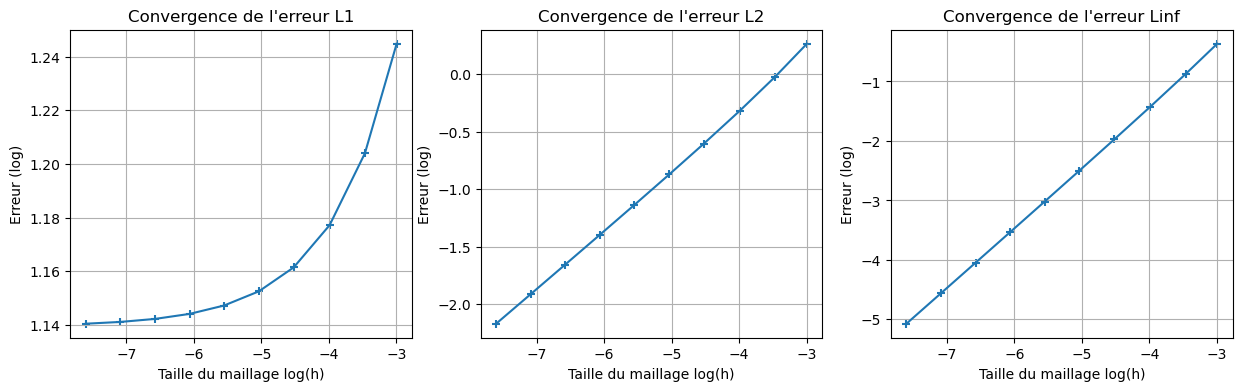

In [97]:
problem = Diffusion(2)

n_values = [int(n) for n in np.logspace(1, 3, 10)]
L1_values = []
L2_values = []
Linf_values = []
for n in n_values:   
    C_values, R_values = problem.solve_for_n_nodes(n, scheme=1)
    C_analytical = analytical_solution(R_values)
    L1 = np.sum(np.abs(C_analytical - C_values))
    L2 = np.sqrt(np.sum((C_analytical - C_values) ** 2))
    Linf = np.max(np.abs(C_analytical - C_values))
    L1_values.append(L1)
    L2_values.append(L2)
    Linf_values.append(Linf)
    
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    
plt.sca(axs[0])
plt.plot(np.log(0.5/np.array(n_values)), np.log(L1_values))
plt.scatter(np.log(0.5/np.array(n_values)), np.log(L1_values), marker='+')

plt.sca(axs[1])
plt.plot(np.log(0.5/np.array(n_values)), np.log(L2_values))
plt.scatter(np.log(0.5/np.array(n_values)), np.log(L2_values), marker='+')

plt.sca(axs[2])
plt.plot(np.log(0.5/np.array(n_values)), np.log(Linf_values))
plt.scatter(np.log(0.5/np.array(n_values)), np.log(Linf_values), marker='+')

error_names = ('L1', 'L2', 'Linf')
for i, ax in enumerate(axs):
    ax.grid(which='both')
    ax.set_title(f'Convergence de l\'erreur {error_names[i]}')
    ax.set_ylabel(f'Erreur (log)')
    ax.set_xlabel('Taille du maillage log(h)')

In [99]:
from scipy.stats import linregress

L = linregress(np.log(0.5/np.array(n_values)), np.log(L2_values))

In [100]:
L.slope

0.5237992366605152

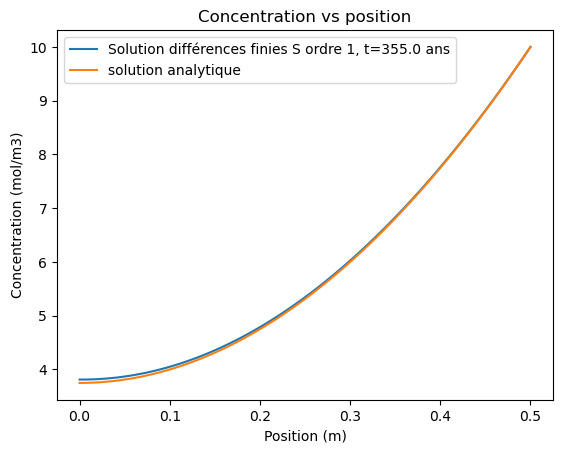

In [17]:
problem = Diffusion(100, scheme=1)
t = 0
times = [t]
change = 100
now = time.time()
while ~np.isclose(change, 0):
    C_vals = problem.C_values.copy()
    t = problem.step(1e8, order=0)
    times.append(t)
    change = np.sum(np.abs(C_vals - problem.C_values))
    print(change)
    clear_output(wait=True)
    if (time.time() - now) > 5:
        break

plt.plot(problem.R_values, problem.C_values, label=f'Solution différences finies S ordre 1, t={np.around(times[-1]/(3600*24*365),0 )} ans')

def analytical_solution(r):
    C = 0.25 * 1e-8/1e-10  * 0.5**2 * ((r/0.5)**2 - 1) + 10
    return C

plt.plot(problem.R_values, analytical_solution(problem.R_values), label='solution analytique')

ax = plt.gca()
ax.set_title('Concentration vs position')
ax.set_xlabel('Position (m)')
ax.set_ylabel('Concentration (mol/m3)')
ax.legend()
plt.show()

8.880654878140604e-09


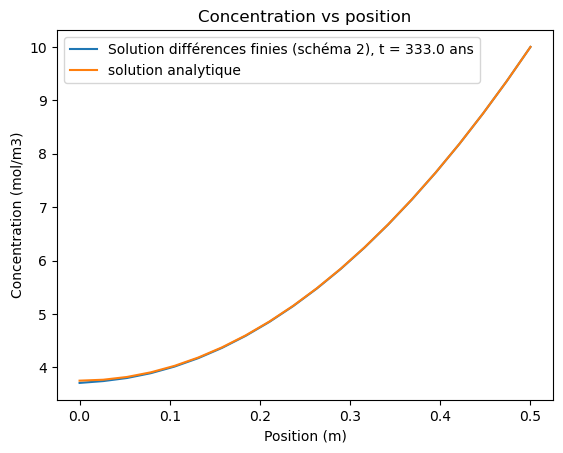

In [101]:
problem = Diffusion(20, scheme=2)
t = 0
times = [t]
change = 100
n_steps = 0
n_steps_max = 1000
while ~np.isclose(change, 0):
    n_steps += 1
    C_vals = problem.C_values.copy()
    t = problem.step(1e8, order=0)
    times.append(t)
    change = np.sum(np.abs(C_vals - problem.C_values))
    clear_output(wait=True)
    print(change)
    
plt.plot(problem.R_values, problem.C_values, label=f'Solution différences finies (schéma 2), t = {np.around(t/(3600 * 24 * 365), 0)} ans')

def analytical_solution(r):
    C = 0.25 * 1e-8/1e-10 * 0.25 * ((r/0.5)**2 - 1) + 10
    return C

plt.plot(problem.R_values, analytical_solution(problem.R_values), label='solution analytique')

ax = plt.gca()
ax.set_title('Concentration vs position')
ax.set_xlabel('Position (m)')
ax.set_ylabel('Concentration (mol/m3)')
ax.legend()